<a href="https://colab.research.google.com/github/Aftabgazali/NLP-in-Action/blob/main/NLP_In_Action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Preprocessing

## Tokenization

In [ ]:
!pip install nltk
!pip install spacy
import nltk
nltk.download('words')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')

In [ ]:
import matplotlib
matplotlib.use('Agg')

 **It's a process of converting a corpus(paragraphs) into a documents(sentences) or into a vocabulary(unique words from a sentence)**

In [ ]:
corpus = """Hello antiyo and antiyo!
mei aur mere daddy mcnodald aye hue hai."""

In [ ]:
print(corpus)

**Corpus ---> Documents**

In [ ]:
from nltk.tokenize import sent_tokenize

documents = sent_tokenize(corpus)

documents

**Documents ---> Vocabularies**

In [ ]:
from nltk.tokenize import word_tokenize

# word_tokenize accepts a string hence we apply the loop over the documents list
for document in documents:
  vocabulary = word_tokenize(document)
  print(vocabulary)



**There are few other vocabulary tokenizers**
* `wordpunt_tokenize`: *splits punctuations as well*
* `TreebankWordTOokenizer`: *doesn't consider '.' as seperate word, however last full stop will be a separate word*

In [ ]:
from nltk.tokenize import wordpunct_tokenize

for document in documents:
  vocabulary = wordpunct_tokenize(document)
  print(vocabulary)

In [ ]:
from nltk.tokenize import TreebankWordTokenizer

for document in documents:
  vocabulary = TreebankWordTokenizer()
  print(vocabulary.tokenize(document))

## Stemming
**Breaking the word into its root form**

* `PorterStemmer()` **basic one has few bugs where it changes the meaning of the words for example flying --> fli**

* `RegexpStemmer()` **accepts few inputs ing$, s$, e$, able$ this means that whenever we have a word which ends with ing it will remove it, '$' sign indicate where do we want to remove it if placed after the filter it will remove from the end of the word and if not given, then it will remove at all places**

* `Snowball Stemmer()` **Performance better than both of the stemmer, it accepts language as an input, one more advantage is that it lowerCases all the words which is helpful, as now 'I' and 'i' will mean the same**

In [ ]:
from nltk.stem import PorterStemmer

words = ['ingeating','eats','eaten','flying','shooting','finally']


stem = PorterStemmer()
for word in words:
  print(f"{word} --->{stem.stem(word)}")

In [ ]:
from nltk.stem import RegexpStemmer

stem = RegexpStemmer('ing$|s$|e$|able$', min=4)
for word in words:
  print(f"{word} ---> {stem.stem(word)}")

In [ ]:
# It will remove 'ing' from both place
stem = RegexpStemmer('ing|s$|e$|able$', min=4)
for word in words:
  print(f"{word} ---> {stem.stem(word)}")

In [ ]:
from nltk.stem import SnowballStemmer

stem = SnowballStemmer('english')

for word in words:
  print(f"{word} ---> {stem.stem(word)}")

## Lemmatization
**Better than Stemming, as the meaning of the word is not changed**
* `WordNetLemmatizer()` **takes pos attribute as input, for noun-n, for verb-v,adjective-a, adverb-r**

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

for word in words:
  print(f"{word} ---> {lemmatizer.lemmatize(word, pos='v')}")



## StopWords
* `stopwords` **Removing all the unwanted stop words like the, although, however, somehow and so on... takes language as the input**

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

In [ ]:
corpus = """If you have any complaint to make about the results of your efforts hitherto, or about myself as your commander, there is no more to say. But let me remind you: through your courage and endurance you have gained possession of Ionia, the Hellespont, both Phrygias, Cappadocia, Paphlagonia, Lydia, Caria, Lycia, Pamphylia, Phoenicia, and Egypt; the Greek part of Libya is now yours, together with much of Arabia, lowland Syria, Mesopotamia, Babylon, and Susia; Persia and Media with all the territories either formerly controlled by them or not are in your hands; you have made yourselves masters of the lands beyond the Caspian Gates, beyond the Caucasus, beyond the Tanais, of Bactria, Hyrcania, and the Hyrcanian sea; we have driven the Scythians back into the desert; and Indus and Hydaspes, Acesines and Hydraotes flow now through country which is ours. With all that accomplished, why do you hesitate to extend the power of Macedon–yourpower–to the Hyphasis and the tribes on the other side ? Are you afraid that a few natives who may still be left will offer opposition? Come, come! These natives either surrender without a blow or are caught on the run–or leave their country undefended for your taking; and when we take it, we make a present of it to those who have joined us of their own free will and fight on our side.

For a man who is a man, work, in my belief, if it is directed to noble ends, has no object beyond itself; none the less, if any of you wish to know what limit may be set to this particular camapaign, let me tell you that the area of country still ahead of us, from here to the Ganges and the Eastern ocean, is comparatively small. You will undoubtedly find that this ocean is connected with the Hyrcanian Sea, for the great Stream of Ocean encircles the earth. Moreover I shall prove to you, my friends, that the Indian and Persian Gulfs and the Hyrcanian Sea are all three connected and continuous. Our ships will sail round from the Persian Gulf to Libya as far as the Pillars of Hercules, whence all Libya to the eastward will soon be ours, and all Asia too, and to this empire there will be no boundaries but what God Himself has made for the whole world.

But if you turn back now, there will remain unconquered many warlike peoples between the Hyphasis and the Eastern Ocean, and many more to the northward and the Hyrcanian Sea, with the Scythians, too, not far away; so that if we withdraw now there is a danger that the territory which we do not yet securely hold may be stirred to revolt by some nation or other we have not yet forced into submission. Should that happen, all that we have done and suffered will have proved fruitless–or we shall be faced with the task of doing it over again from the beginning. Gentlemen of Macedon, and you, my friends and allies, this must not be. Stand firm; for well you know that hardship and danger are the price of glory, and that sweet is the savour of a life of courage and of deathless renown beyond the grave.

Are you not aware that if Heracles, my ancestor, had gone no further than Tiryns or Argos–or even than the Peloponnese or Thebes–he could never have won the glory which changed him from a man into a god, actual or apparent? Even Dionysus, who is a god indeed, in a sense beyond what is applicable to Heracles, faced not a few laborious tasks; yet we have done more: we have passed beyond Nysa and we have taken the rock of Aornos which Heracles himself could not take. Come, then; add the rest of Asia to what you already possess–a small addition to the great sum of your conquests. What great or noble work could we ourselves have achieved had we thought it enough, living at ease in Macedon, merely to guard our homes, accepting no burden beyond checking the encroachment of the Thracians on our borders, or the Illyrians and Triballians, or perhaps such Greeks as might prove a menace to our comfort ?

I could not have blamed you for being the first to lose heart if I, your commander, had not shared in your exhausting marches and your perilous campaigns; it would have been natural enough if you had done all the work merely for others to reap the reward. But it is not so. You and I, gentlemen, have shared the labour and shared the danger, and the rewards are for us all. The conquered territory belongs to you; from your ranks the governors of it are chosen; already the greater part of its treasure passes into your hands, and when all Asia is overrun, then indeed I will go further than the mere satisfaction of our ambitions: the utmost hopes of riches or power which each one of you cherishes will be far surpassed, and whoever wishes to return home will be allowed to go, either with me or without me. I will make those who stay the envy of those who return."""

print(corpus)

**First apply tokenization (corpus --> Documents --> Words) then apply stemming on words only if they are not present in the stopwords**

In [ ]:
documents = nltk.sent_tokenize(corpus)
documents

In [ ]:
for i in range(len(documents)):
  words = nltk.word_tokenize(documents[i])
  words = [stem.stem(word) for word in words if word not in set(stopwords.words('english'))]
  documents[i] = ' '.join(words)

In [ ]:
documents

**Trying out using lemmatizer for better results**

In [ ]:
for i in range(len(documents)):
  words = nltk.word_tokenize(documents[i])
  words = [lemmatizer.lemmatize(word.lower()) for word in words if word not in set(stopwords.words('english'))]
  # Joing back to the documents/sentence
  documents[i] = ' '.join(words)
documents

## Short Exercise

In [ ]:
corpus = """Inflation rose again in April, continuing a climb that has pushed consumers to the brink and is threatening the economic expansion, the Bureau of Labor Statistics reported Wednesday.\n\nThe consumer price index, a broad-based measure of prices for goods and services, increased 8.3% from a year ago, higher than the Dow Jones estimate for an 8.1% gain. That represented a slight ease from Marchâ€™s peak but was still close to the highest level since the summer of 1982.\n\nRemoving volatile food and ene"""
print(corpus)


In [ ]:
doc = nlp(corpus)
doc

**Extract only the NOUN Tokens in a list and NUM separately**

In [ ]:
noun_filtered_list = []
num_filtered_list = []
for token in doc:
  if token.pos_ in ["NOUN"]:
    noun_filtered_list.append(token)
  elif token.pos_ in ['NUM']:
    num_filtered_list.append(token)

num_filtered_list

**Print count of all POS tags**

In [ ]:
pos_tag_counts = doc.count_by(spacy.attrs.POS)

for key, val in pos_tag_counts.items():
  print(f"{doc.vocab[key].text} | {val} counts")

##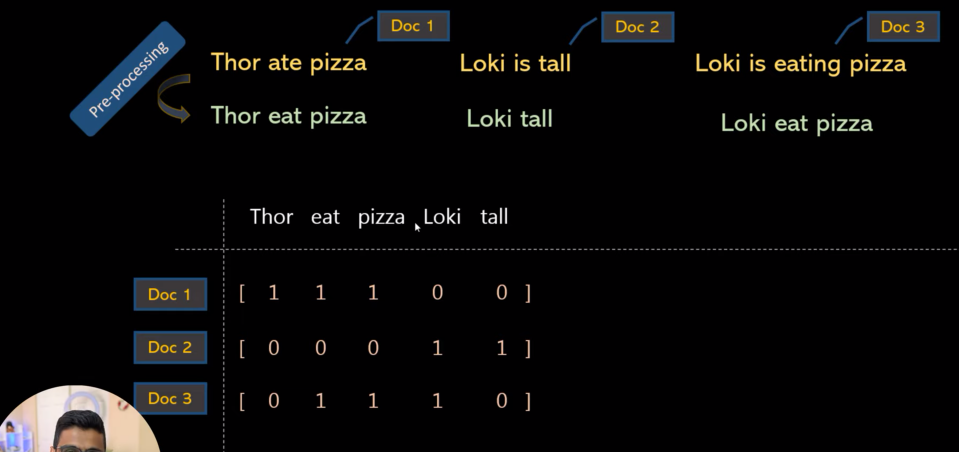 Named Entity Recognition

***For example from a text you want to extract details like whether the word is a company or a person or a number or a products and so on...***

***Another use case would be, imagine if you have any problem related to your machine, the NER will detect whether from the given text it's a problem of hardware or software by picking up relevant entity and this could be useful to route the ticket to the specific team***

*Tesla Inc | ORG | Companies, agencies, institutions, etc.*

*$45 billion | MONEY | Monetary values, including unit*

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
nlp.pipe_names

In [ ]:
doc = nlp("Tesla Inc is going to acquire Twitter Inc for $45 billion")

for ent in doc.ents:
  print(f"{ent.text} | {ent.label_} | {spacy.explain(ent.label_)}")

In [ ]:
from spacy import displacy

displacy.render(doc, style='ent')

**Creating our own custom entitiy**

In [ ]:
doc[2:5]

**Here I set 'Twitter' as MONEY Entity, I extracted Twitter from doc by specifying the label [inclusive,exclusive]**

In [ ]:
from spacy.tokens import Span

s1 = Span(doc, 0,1,label='ORG')
s2 = Span(doc, 6,7,label="MONEY")

#set the span, and keep the rest as unchanged
doc.set_ents([s1,s2], default='unmodified')

displacy.render(doc, style='ent')

# Feature Engineering
* ***`One Hot Encoding & Label Encoder`:*** **are no longer used because they suffer from various problems such as occupying a lot of computational memory, as we know one hot encoding creates a separate vectors for each unique words, imagine in an email if you have 500k words then there will be 500k unique vectors for each words. It also suffers from OVR problem wherein if a new word is introduced which is not present in the vector space to represent them in the OHE will be difficult and redundant**

* ***`Bag of Words`:*** **It creates a count vectorizers for each document, imagine you have 5 email having one document each, so the number of rows in the count vectorizer will be 5 and the number of column will be all the unqiue words present in whole 5 email. Then corresponding to the first email we are going to increase the count of that word that occurs in that email the rest of the words will marked as zero and as there will be a lot of unique words present in the column most of them will be zero (those words which doesn't occur in the first doc) hence it is called as Sparse Matrix, The number of rows in the count vectorizer is not necessarily equal to the number of documents. Instead, the count vectorizer creates a separate row (vector) for each document, but the total number of rows is equal to the number of documents multiplied by the number of unique words in the entire corpus.**

* ***`Stopwords`:*** **Stop words are an efficient approach which can help us improve the accuracy of BOW Model, however there are instances where we should not apply this technique, mainly during Sentiment analysis as 'not' is also a stopword, also while making chat bots and so on..**

* ***`n-gram BOW`:*** **BOW is a special case of n-gram BOW wherein n=1 that mean the words are separated by n, for n=2 the words will be separated like like Alice walk, He ate and so on...This reduces the sparcity and reduces computation as the matrix size will be reduce with increasing value of n**

* ***`Tf-Idf`:*** What is TF-IDF?

    TF stands for Term Frequency and denotes the ratio of number of times a particular word appeared in a Document to total number of words in the document.

       Term Frequency(TF) = [number of times word appeared / total no of words in a document]

    Term Frequency values ranges between 0 and 1. If a word occurs more number of times, then it's value will be close to 1.

    IDF stands for Inverse Document Frequency and denotes the log of ratio of total number of documents/datapoints in the whole dataset to the number of documents that contains the particular word.

       Inverse Document Frequency(IDF) = [log(Total number of documents / number of documents that contains the word)]

    In IDF, if a word occured in more number of documents and is common across all documents, then it's value will be less and ratio will approaches to 0.

    Finally:

       TF-IDF = Term Frequency(TF) * Inverse Document Frequency(IDF)
    
* ***`WordEmbedding:`*** ***Offers a more dense representation compared to traditional sparse representations like one-hot encoding. Word embeddings capture semantic relationships between words. Words with similar meanings are represented by vectors that are closer together in the embedding space, enabling the model to understand and leverage semantic relationships during training.***




### ***Implementing a Spam or Ham Classifier using BOW***

In [ ]:
import pandas as pd
df = pd.read_csv('spam.csv')
df.head()

**It's an imbalance Dataset**

In [ ]:
df['Category'].value_counts()

In [ ]:
X, y = df['Message'].values, df['Category'].values

**Encode the Dependent Variable**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

*Spam-->1 ham-->0*

In [ ]:
y[:5][0]

In [ ]:
X[:5][0]

**Splitting the data 80/20 %**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_cv = v.fit_transform(X_train)
X_test_cv = v.transform(X_test)

**There are 7806 unique words in our Vocabulary**

In [ ]:
X_train_cv.toarray().shape

**All the words that our vocabulary has**

In [ ]:
v.get_feature_names_out()[1000:1050]

**This will give which vocabulary is present at which index**

In [ ]:
v.vocabulary_

In [ ]:
v.get_feature_names_out()[7450]

**Building the Model**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train_cv, y_train)

In [ ]:
y_train_preds = model.predict(X_train_cv)
y_test_preds = model.predict(X_test_cv)

In [ ]:
from sklearn.metrics import accuracy_score
print(f"Training Accuracy {accuracy_score(y_train, y_train_preds)*100:.2f}% | Testing Accuracy {accuracy_score(y_test, y_test_preds)*100:.2f}%")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Assuming you have the true labels and predicted labels
true_labels = y_test  # True labels
predicted_labels = y_test_preds  # Predicted labels

# Generate classification report
report = classification_report(true_labels, predicted_labels, output_dict=True)
custom_palette = sns.color_palette("coolwarm", as_cmap=True)
# Convert classification report to DataFrame for visualization
df_report = pd.DataFrame(report).transpose()

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap=custom_palette, fmt='g')
plt.title('Classification Report')
plt.show()


In [ ]:
emails = ['Hey Aftab, can we get together to watch football game tommorow? ',
          'Upto 90% discount Wow!! you get $1000 off on your first purchase from us']

email_cv = v.transform(emails)

In [ ]:
test_pred = model.predict(email_cv)

**It predicted first as not spam, and the second as Spam**

In [ ]:
test_pred

**Doing the same thing using Pipeline**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
nb_model_pipeline = make_pipeline(CountVectorizer(), MultinomialNB())
lg_model_pipeline = make_pipeline(CountVectorizer(), LogisticRegression(C=0.01,solver='lbfgs',penalty='l2'))

nb_model_pipeline.fit(X_train, y_train)
lg_model_pipeline.fit(X_train,y_train)

In [ ]:
print(f"Testing Accuracy of Gaussian Nb {nb_model_pipeline.score(X_test, y_test)*100:.2f}%")
print(f"Testing Accuracy of Logistic Model {lg_model_pipeline.score(X_test, y_test)*100:.2f}%")

### ***Let's look at how we can apply Stop words on a dataset***

In [ ]:
df = pd.read_csv('spam.csv')
df.head()

In [ ]:
df.shape

**Let's reduce the size of the dataset for better understandibility**

In [ ]:
df = df.head(100)
df.shape

In [ ]:
df['Message'][0]

**A method that removes the stop words and punctuations from a given text and returns a list of words without any stop words**

In [ ]:
def preprocess(text):
  doc = nlp(text)
  text_without_stopwords = [token.text for token in doc if not token.is_stop and not token.is_punct]

  # If we want a doc string back we can convert list to string using " ".join(list)
  return " ".join(text_without_stopwords)
  #return text_without_stopwords

In [ ]:
preprocess('Go until jurong point, crazy.. Available only in bugis! n great world, la e buffet... Cine there got amore wat...')

In [ ]:
df.head()

**To make changes on any Series we have to use `apply()` function**

In [ ]:
df['new_message'] = df['Message'].apply(preprocess)
df.head()

In [ ]:
print(f"Original Message {len(df['Message'][0])} | New Message reduced without stopwords {len(df['new_message'][0])} | reduced by {len(df['Message'][0]) - len(df['new_message'][0])} words")

### N-gram BOW

***Applying both one-gram & bi-gram model `ngram_range=(1,2)`***

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(ngram_range=(1,2))

v.fit(["Thor the norse god is looking for a job"])
v.vocabulary_

**Remove all the stop words & punctuations from the given text and print its print after lemmatization**

In [ ]:
def preprocess_with_lemma(text):
  doc = nlp(text)
  filtered_list = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
  return " ".join(filtered_list)

preprocess_with_lemma("Loki is eating a pizza")

In [ ]:
corpus = [
    "Thor ate pizza",
    "Loki was sleeping on the beach",
    "I am finding it difficult to learn french",
    "Munsur, takes class only twice a week"
]
print(corpus)

In [ ]:
corpus_preprocessed = [preprocess_with_lemma(text) for text in corpus]
corpus_preprocessed

***Now, apply the count vectorizer of bi-gram***

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,2))
cv.fit_transform(corpus_preprocessed)

In [ ]:
cv.vocabulary_

***We will face OOV Problem as Hulk is not present in our Vocabulary***

In [ ]:
cv.transform(["Hulk eat a pizza"]).toarray()

In [ ]:
cv.vocabulary_

### Short Exercise

In [ ]:
import pandas as pd
import spacy
import numpy as np

nlp = spacy.load('en_core_web_sm')

In [ ]:
df = pd.read_csv('Fake_Real_Data.csv')
print(df.shape)
df.head()

In [ ]:
df['label'].value_counts()

**Let's say we will apply undersampling in order to shorten the dataset and will only take 2000 real and 2000 fake samples**

In [ ]:
min_samples = 500

df_real = df[df['label'] =='Real'].sample(min_samples)
df_fake = df[df['label'] == 'Fake'].sample(min_samples)

df = pd.concat([df_real, df_fake], axis = 0)
# Shuffle them, now the dataset will be random order.
df = df.sample(frac=1).reset_index(drop=True)
df.head()

In [ ]:
df.shape

***Let's create a preprocess function that will apply stop words, lemmatization, before feeding it to n-gram bag of words model***

In [ ]:
def preprocess_with_lemma(text):
  doc = nlp(text)
  filtered_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
  return " ".join(filtered_tokens)

preprocess_with_lemma('Hello, this is just to check whether the function is Implemented correctly or not?')

In [ ]:
df['filtered_text'] = df['Text'].apply(preprocess_with_lemma)

In [ ]:
df.head(3)

***Let's see how much have we reduced from the first example***

In [ ]:
print(f"Original Text length: {len(df['Text'][0])} | Filetered Text length: {len(df['filtered_text'][0])} ")

***Label Encoding the Target Variable***

*Fake --> 0 & Real --> 1*

In [ ]:
from sklearn.preprocessing import LabelEncoder
X, y = df['filtered_text'].values, df['label'].values

le = LabelEncoder()
y = le.fit_transform(y)
y[:5]

***Let's build our Model***

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
model_v0_pipeline = make_pipeline(CountVectorizer(ngram_range=(1,2)), MultinomialNB())
model_v1_pipeline = make_pipeline(CountVectorizer(ngram_range=(1,2)), LogisticRegression(C=0.01, penalty='l2', solver='lbfgs'))
model_v0_pipeline.fit(X_train, y_train)
model_v1_pipeline.fit(X_train,y_train)

***Testing Accuracy of 98% Accuracy Not Bad! also Logistic is performing better than NB***

In [ ]:
print(f"Training Accuracy of NB model {model_v0_pipeline.score(X_train, y_train)*100:.2f} | Testing Accuracy {model_v0_pipeline.score(X_test, y_test)*100:.2f}")
print(f"Training Accuracy of Logistic model {model_v1_pipeline.score(X_train, y_train)*100:.2f} | Testing Accuracy {model_v1_pipeline.score(X_test, y_test)*100:.2f}")

***Print Classification Report in case of Imbalance Dataset***

In [ ]:
from sklearn.metrics import classification_report
y_pred = model_v1_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

### Tf-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [ ]:
print(corpus)

In [ ]:
tf_idf = TfidfVectorizer()
tf_idf.fit_transform(corpus)
print(tf_idf.vocabulary_)

***Let's look at the Tf-Idf score for each words in the vocabulary `tf_idf.idf_[index]`***

***So the word which occurs in most documents for a lot of time will have a very less influence and hence will have less score, vice versa***

In [ ]:
scores = []
for key, value in tf_idf.vocabulary_.items():
  scores.append([key,tf_idf.idf_[value]])
  #print(f"{key} == {tf_idf.idf_[value]}")

scores

## Word Embedding

In [ ]:
df = pd.read_csv('Fake_Real_Data.csv')
df.head()

In [ ]:
df.shape

In [ ]:
df['label'].value_counts()

In [ ]:
import spacy
spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg")

In [ ]:
min_samples = 500

df_real = df[df['label'] =='Real'].sample(min_samples)
df_fake = df[df['label'] == 'Fake'].sample(min_samples)

df = pd.concat([df_real, df_fake], axis = 0)
# Shuffle them, now the dataset will be random order.
df = df.sample(frac=1).reset_index(drop=True)
df.head()

In [ ]:
df.shape

In [ ]:
df['vector'] = df['Text'].apply(lambda x: nlp(x).vector)

***We will now have a vector representation of each doc present in the dataset***

In [ ]:
df.head()

***Perform the label encoding***

In [ ]:
X,y = df['vector'].values, df['label'].values

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
y[:3]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, stratify=y)

***Building the Model***

In [ ]:
X_train = np.stack(X_train)
X_test = np.stack(X_test)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
model_v0_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 5))
model_v0_pipeline.fit(X_train, y_train)

In [ ]:
print(f"Training Accuracy of NB model {model_v0_pipeline.score(X_train, y_train)*100:.2f} | Testing Accuracy {model_v0_pipeline.score(X_test, y_test)*100:.2f}")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model_v0_pipeline.predict(X_test)))